    Multilayers Perceptron and the backpropagation algorithm
    
    Exercise H3.1
    

In [6]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import copy

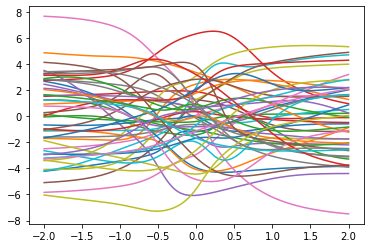

In [166]:
def create_NLP(NLP,Hidd):
    parameters_f = []
    for i in range (NLP):
        parameters_t =[]
        for j in range(Hidd):
            parameters_t.append([np.random.normal(0,1), np.random.normal(0,2), np.random.uniform(-2,2)])
        parameters_f.append(parameters_t)
    return parameters_f

def input_output(NLP,x):
    #input 1 NLP (a list) and a vector x
    #output 1 value (the output) of the network
    out = 0
    for i in range(len(NLP)):
        out += NLP[i][0]*np.tanh(NLP[i][1]*x-NLP[i][2])
    return out

def plotting(NLP,x):
    for i in NLP:
        plt.plot(x, input_output(i,x))
    return
    
Nb_NLP  = 50
Nb_Hidd = 10
NLP = create_NLP(Nb_NLP,Nb_Hidd)
plotting(NLP,np.linspace(-2,2,10000))

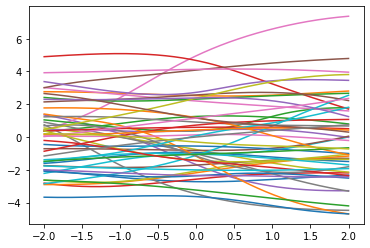

In [167]:
def create_NLP_2(NLP,Hidd):
    parameters_f = []
    for i in range (NLP):
        parameters_t =[]
        for j in range(Hidd):
            parameters_t.append([np.random.normal(0,1), np.random.normal(0,0.5), np.random.uniform(-2,2)])
        parameters_f.append(parameters_t)
    return parameters_f

Nb_NLP  = 50
Nb_Hidd = 10
NLP_2 = create_NLP_2(Nb_NLP,Nb_Hidd)
plotting(NLP_2, np.linspace(-2,2,10000))

    Shallower 
    Change names to MLP

In [168]:
def mean_squared_error(NLP):
    x =np.linspace(-2,2,10000)
    y = - x
    memory =[]
    for j in NLP :
        y_hat = input_output(j,x)
        mse = np.mean((y -y_hat)**2)
        memory.append(mse)
    return memory

memory_mse = mean_squared_error(NLP)
NLP[memory_mse.index(np.min(memory_mse))] # NLP with the smallest mse with the first rule
index = memory_mse.index(np.min(memory_mse))


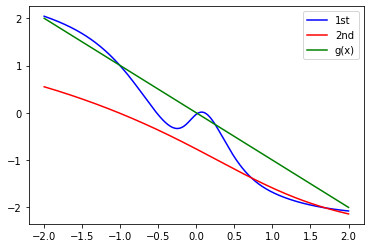

In [169]:
memory_mse_2 = mean_squared_error(NLP_2)
index2 = memory_mse_2.index(np.min(memory_mse_2)) # index of the NLP with the smallest mse with the second rule
x =  np.linspace(-2,2,10000)

plt.plot(x, input_output(NLP[index],x), c = 'blue', label = '1st')
plt.plot(x, input_output(NLP_2[index2],x), c= 'red', label= '2nd')
plt.plot(x, -x, c= 'green', label= 'g(x)')
plt.legend()

    Exercise H3.2

In [7]:
data = np.loadtxt(r'c:\Users\HAMON\RegressionData.txt')

X = np.array([[data[i][0] for i in range (len(data))]])
Y = np.array([[data[i][1] for i in range (len(data))]])

def initialize_parameters (n_x,n_h,n_y):
    W1 = np.random.randn(n_h,n_x)
    W2 = np.random.randn(n_y,n_h)
    b1 = np.random.randn(n_h,1)
    b2 = np.random.rand(n_y,1)
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters


In [8]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The linear output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = Z2
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [9]:
def compute_cost(A2, Y):
    """    
    Arguments:
    A2 -- The linear output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost 
    
    """
    cost = (1/len(Y[0]))* (np.sum(np.power((A2-Y),2)))
    cost = float(np.squeeze(cost))  
    
    return cost

In [14]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = len(X[0])
    W1 = parameters["W1"]
    W2 = parameters["W2"]    

    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 =1/m*np.dot(np.dot(X,X.T),W2)  - 1/m*np.dot(X,Y)

    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims = True)
    
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1,2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims = True)
    
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [15]:
def update_parameters(parameters, grads, learning_rate = 0.1):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    W1 = copy.deepcopy(parameters["W1"])
    b1 = parameters["b1"]
    W2 = copy.deepcopy(parameters["W2"])
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [16]:
def nn_model(X, Y,n_x,n_y,n_h, threshold= 10e-5, iteration = 3000):
    """
    Arguments:
    X -- dataset of shape (1, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    parameters = initialize_parameters (n_x, n_h, n_y)
    cost = [100]
    for i in range (iteration):
        A2,cache = forward_propagation(X,parameters)
        cost.append(compute_cost(A2,Y))
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters (parameters, grads)
        if abs(cost[i ] - cost[i-1])/cost[i] < threshold  :
            return parameters,i,cache,cost[1:]
    
    return parameters,i,cache,cost[1:]

In [17]:
parameters,i,cache,cost = nn_model(X,Y,n_x = 1,n_y=1,n_h=3)
parameters_2,i2,cache_2,cost_2 = nn_model(X,Y,n_x = 1,n_y=1,n_h=3)

figure, axis = plt.subplots(1,2,figsize=(7,4))

axis[0].plot(cost)
axis[0].set_title('Evolution of the cost over the iterations')
axis[0].set_xlabel('iterations')
axis[0].set_ylabel('cost Et')

axis[1].plot(cost_2)
axis[1].set_title('Evolution of the cost over the iterations')
axis[1].set_xlabel('iterations')
axis[1].set_ylabel('cost Et')
figure.tight_layout()


ValueError: shapes (1,10) and (1,10) not aligned: 10 (dim 1) != 1 (dim 0)

    Plot the output of the hidden units for all input

Text(0, 0.5, 'output of the neuron')

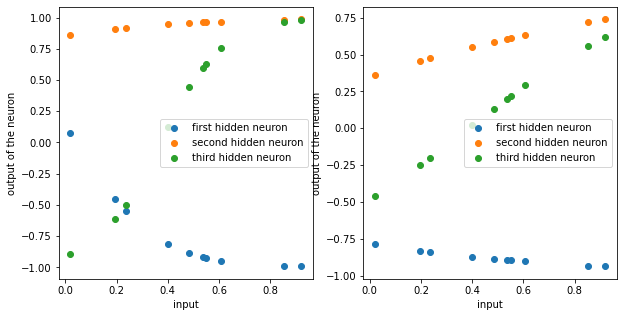

In [171]:
A1 = cache["A1"]
A1_2 = cache_2["A1"]

figure, axis = plt.subplots(1,2,figsize=(10,5))

axis[0].scatter(X,A1[0],label = 'first hidden neuron')
axis[0].scatter(X,A1[1],label = 'second hidden neuron')
axis[0].scatter(X,A1[2],label = 'third hidden neuron')
axis[0].legend()
axis[0].set_xlabel('input')
axis[0].set_ylabel('output of the neuron')

axis[1].scatter(X,A1_2[0],label = 'first hidden neuron')
axis[1].scatter(X,A1_2[1],label = 'second hidden neuron')
axis[1].scatter(X,A1_2[2],label = 'third hidden neuron')
axis[1].legend()
axis[1].set_xlabel('input')
axis[1].set_ylabel('output of the neuron')

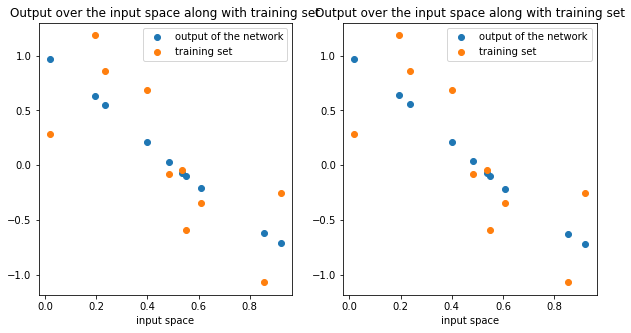

In [164]:
figure, axis = plt.subplots(1,2,figsize=(10,5))

axis[0].scatter(X,cache["A2"],label= 'output of the network')
axis[0].scatter(X,Y,label='training set')
axis[0].set_title('Output over the input space along with training set')
axis[0].set_xlabel('input space')
axis[0].legend()

axis[1].scatter(X,cache_2["A2"],label= 'output of the network')
axis[1].scatter(X,Y,label='training set')
axis[1].set_title('Output over the input space along with training set')
axis[1].set_xlabel('input space')
axis[1].legend()

The quadratic loss function